

# Chapter 5 Quiz Instructions

Read Chapter 5 of *Essential Math for Data Science* by Thomas Nield. This is available to you through UMGC's Library. Look closely at the questions at the end of the chapter and then look at the solutions provided in the appendix. When you are ready, work through this notebook to answer these quiz questions. Once you are satisfied with your answers, go to the classroom to submit your answers. You have two attempts, so if you miss a question, come back here to work out another answer.

A company wants to increase their revenue and have been told that increasing their spending on advertisements will help. They want to spend their money wisely and ask for a prediction to be made.

To build a model, we will use Python to generate a set of random numbers, a random bivariate dataset with a linear relationship between x and y, where y is approximately equal to 3 times x plus an intercept of 2, with some normally distributed noise. Spends in ad (x) and the revenue generated (y) (in thousands).

Note: We will use the same dataset for all questions in this Ch. 5 quiz, i.e., after you generated the random sample dataset x you will use it for the rest of the quiz.


0.000 0.101 0.202 0.303 0.404 0.505 0.606 0.707 0.808 0.909
1.010 1.111 1.212 1.313 1.414 1.515 1.616 1.717 1.818 1.919
2.020 2.121 2.222 2.323 2.424 2.525 2.626 2.727 2.828 2.929
3.030 3.131 3.232 3.333 3.434 3.535 3.636 3.737 3.838 3.939
4.040 4.141 4.242 4.343 4.444 4.545 4.646 4.747 4.848 4.949
5.051 5.152 5.253 5.354 5.455 5.556 5.657 5.758 5.859 5.960
6.061 6.162 6.263 6.364 6.465 6.566 6.667 6.768 6.869 6.970
7.071 7.172 7.273 7.374 7.475 7.576 7.677 7.778 7.879 7.980
8.081 8.182 8.283 8.384 8.485 8.586 8.687 8.788 8.889 8.990
9.091 9.192 9.293 9.394 9.495 9.596 9.697 9.798 9.899 10.000



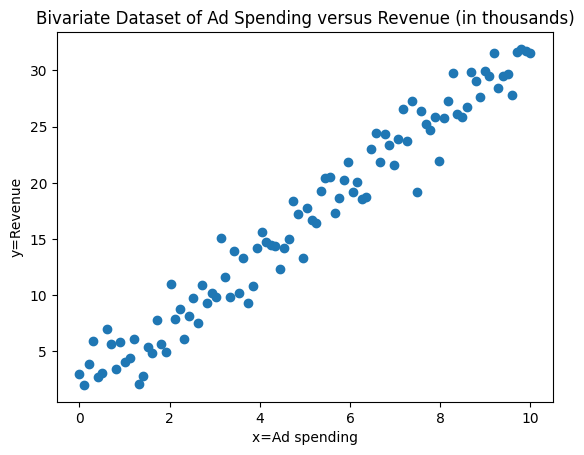

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(42)
x = np.linspace(0, 10, 100)
x_rounded = np.around(x, decimals=3)
y = 3 * x_rounded + 2 + np.random.normal(0, 2, 100)
# Reshape x_rounded to a 10x10 matrix
x_matrix = x_rounded.reshape(10, 10)

# Print the matrix, otherwise all the data will be printed in a row which is too messy
for row in x_matrix:
    print(" ".join(["%.3f" % val for val in row]))
# save the rounded x values to 3 decimal places back to x so we can use it for the other questions
x=x_rounded
# Plot scatterplot for the dataset
print("")
plt.scatter(x_matrix, y)
plt.xlabel('x=Ad spending')
plt.ylabel('y=Revenue')
plt.title('Bivariate Dataset of Ad Spending versus Revenue (in thousands)')
plt.show()

# Question 1
Perform a simple linear regression to find the m (intercept) and b (slope) values that minimize the loss (sum of squares). That is, create a regression equation created during the setup.

- What is the the slope of the line?

The  slope of the line is `3.028`

Hint: you may use the function "linregress" to create this equation

In [6]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print the regression results
print("Regression equation: y = %.3f" %slope, "* x +  %.3f" %intercept)

Regression equation: y = 3.028 * x +  1.654


# Question 2
Calculate the correlation coefficient and statistical significance of this data (at 95% confidence). Is the correlation useful?

Hint: the results for them have been calculated in the function "linregress" and the output for them are r_value and p_value respectively

In [7]:
# Print the correlation coefficient and p-value
print("Correlation coefficient: %.5f" %r_value)
print("p-value: %.5f" %p_value)

Correlation coefficient: 0.97972
p-value: 0.00000


# Question 3
If the company spends $50K in ad spending (x = 50), what is the 95% prediction interval for the predicted value of revenue (y)?

Hints: You should be able to find the formula in textbook or online for the formula to be used to calculate the standard error of the estimate

Note: when we use the t.ppf (Percent Point function), we are looking for the q values. If we want a 95% margin of error, that leave 5% in the two tails of the distribution. This means that each tail is 2.5% which means that the upper cutoff point is 97.5% and the lower is 2.5%.

Enter the value of ad spending into the code below where you see a question mark (?).

In [8]:
from scipy.stats import t

# Calculate the standard error of the estimate
ad_spending = 50
SE = std_err * np.sqrt(1 + 1 / len(x) + (ad_spending - np.mean(x)) ** 2 / np.sum((x - np.mean(x)) ** 2))

# Calculate the prediction interval
t_value = t.ppf(0.975, len(x) - 2)
prediction_interval = t_value * SE
lower = np.around((slope * ad_spending + intercept) - prediction_interval, decimals=3)
upper = np.around((slope * ad_spending + intercept) + prediction_interval, decimals=3)

# Print the prediction interval
print("95% Prediction Interval: ", lower, "to", upper)


95% Prediction Interval:  152.806 to 153.263


# Question 4
Start your regression over (but use the same dataset) and do a train/test split. Feel free to experiment with cross-validation and random-fold validation.
Use a test size of 20% and training size of 80%.

True or False- the linear regression performs well and consistently.

Hints: The R-squared value measures how well the linear regression model fits the testing data. A value close to 1 indicates a good fit, while a value close to 0 suggests poor fit.

Note: For more advanced evaluation techniques like cross-validation or random-fold validation, you can refer to the scikit-learn documentation and explore additional methods to assess the performance of the linear regression model.

Enter the test size in the code below where the question mark (?) is.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Perform train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train)

# Evaluate the model on the testing data
r_squared = model.score(x_test.reshape(-1, 1), y_test)

# Print the R-squared value
print("R-squared value on testing data: %.4f" %r_squared)

R-squared value on testing data: 0.9683
